## Modelado de Temas con LDA

- Aplique LDA para identificar 7 topicos principales en las noticias 
- Muestre los resultados del modelo con 3 noticias de ejemplo

In [1]:
import pandas as pd

df = pd.read_csv(
    "noticias_unificadas.tsv",
    encoding="utf-8",
    sep="\t",
    dtype={"fecha": "string", "titulo": "string", "contenido": "string", "seccion": "string", "link": "string"},
    quoting=0,
    na_filter=False
)

In [2]:
df.head()

,fecha,titulo,contenido,seccion,link
0,2025-11-09,jueces rechazan intento de afectacion a la ind...,desde la ciudad de tacna jueces y juezas de to...,Política,https://diariocorreo.pe/politica/jueces-rechaz...
1,2025-11-09,liga lo gritan los churres y todo el pueblo de...,alianza atletico le saco lustre a su clasifica...,Deportes,https://diariocorreo.pe/deportes/alianza-atlet...
2,2025-11-09,proponen sancionar con hasta anos de carcel a ...,la congresista elizabeth medina hermosillo de ...,Política,https://diariocorreo.pe/politica/proponen-sanc...
3,2025-11-09,este lunes inicia la semana de representacion ...,desde este lunes hasta el viernes de noviembre...,Política,https://diariocorreo.pe/politica/este-lunes-in...
4,2025-11-09,seleccion peruana evalua reprogramacion de par...,la federacion peruana de futbol fpf informo qu...,Deportes,https://diariocorreo.pe/deportes/seleccion-per...


In [3]:
from utils.utils import clean_text

df["headline_text"] = (df["seccion"].fillna("") + " " + df["titulo"].fillna("") + " " + df["contenido"].fillna(""))
df["headline_text"] = df["headline_text"].map(clean_text)

df.head()

,fecha,titulo,contenido,seccion,link,headline_text
0,2025-11-09,jueces rechazan intento de afectacion a la ind...,desde la ciudad de tacna jueces y juezas de to...,Política,https://diariocorreo.pe/politica/jueces-rechaz...,politica jueces rechazan intento de afectacion...
1,2025-11-09,liga lo gritan los churres y todo el pueblo de...,alianza atletico le saco lustre a su clasifica...,Deportes,https://diariocorreo.pe/deportes/alianza-atlet...,deportes liga lo gritan los churres y todo el ...
2,2025-11-09,proponen sancionar con hasta anos de carcel a ...,la congresista elizabeth medina hermosillo de ...,Política,https://diariocorreo.pe/politica/proponen-sanc...,politica proponen sancionar con hasta anos de ...
3,2025-11-09,este lunes inicia la semana de representacion ...,desde este lunes hasta el viernes de noviembre...,Política,https://diariocorreo.pe/politica/este-lunes-in...,politica este lunes inicia la semana de repres...
4,2025-11-09,seleccion peruana evalua reprogramacion de par...,la federacion peruana de futbol fpf informo qu...,Deportes,https://diariocorreo.pe/deportes/seleccion-per...,deportes seleccion peruana evalua reprogramaci...


In [4]:
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim

STOPWORDS = set(stopwords.words("spanish"))

In [5]:

STOP_EXTRA = {"dijo","anos","foto","video","puedes","ver","hoy","ayer","manana", "mas", "recomendado", "ser", "dia", "dias", "tambien", "cada", "tras", "soles", "uno", "dos", "tres", "asi", "mil", "ano", "año", "solo", "senalo", "segun", "entre", "millones", "lugar", "puede", "haber", "tener", "sol","precio", "yape", "pai", "nueva"}
STOPWORDS |= STOP_EXTRA

In [6]:
from nltk.stem.snowball import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            stemmed = spanish_stemmer.stem(token)
            result.append(stemmed)
    return result

In [7]:
stem = spanish_stemmer.stem("bueno")
print(f"bueno -> {stem}")

bueno -> buen


In [8]:
data_text = df[['headline_text']]
data_text['index'] = data_text.index
doc_sample = data_text[data_text['index'] == 4310].values[0][0]
documents = data_text

/tmp/ipykernel_372121/179027989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [9]:
print(len(documents))
print(documents[:5])

37746
                                       headline_text  index
0  politica jueces rechazan intento de afectacion...      0
1  deportes liga lo gritan los churres y todo el ...      1
2  politica proponen sancionar con hasta anos de ...      2
3  politica este lunes inicia la semana de repres...      3
4  deportes seleccion peruana evalua reprogramaci...      4


In [10]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('documento original: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n documento tokenizado y lematizado: ')
print(preprocess(doc_sample))

documento original: 
['politica', 'congreso', 'presentan', 'proyecto', 'de', 'ley', 'para', 'prohibir', 'el', 'uso', 'del', 'condor', 'andino', 'en', 'actividades', 'publicas', 'la', 'congresista', 'katy', 'ugarte', 'del', 'bloque', 'magisterial', 'presento', 'un', 'proyecto', 'de', 'ley', 'que', 'busca', 'prohibir', 'el', 'uso', 'del', 'condor', 'andino', 'en', 'festividades', 'espectaculos', 'o', 'cualquier', 'actividad', 'publica', 'que', 'implique', 'riesgo', 'o', 'maltrato', 'para', 'esta', 'especie', 'la', 'iniciativa', 'tambien', 'plantea', 'la', 'prohibicion', 'de', 'su', 'caza', 'captura', 'comercializacion', 'y', 'transporte', 'con', 'fines', 'lucrativos', 'como', 'parte', 'de', 'una', 'estrategia', 'para', 'garantizar', 'su', 'recuperacion', 'y', 'conservacion', 'el', 'proyecto', 'denominado', 'ley', 'de', 'recuperacion', 'y', 'conservacion', 'del', 'condor', 'andino', 'tiene', 'como', 'objetivo', 'principal', 'proteger', 'a', 'esta', 'ave', 'emblematica', 'y', 'su', 'habita

In [11]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0    [polit, juec, rechaz, intent, afect, independe...
1    [deport, lig, grit, churr, puebl, sullan, alia...
2    [polit, propon, sancion, carcel, cubr, rostr, ...
3    [polit, lun, inici, seman, represent, congres,...
4    [deport, seleccion, peruan, evalu, reprogram, ...
5    [polit, pacasmay, orden, identific, trabaj, co...
6    [polit, gobiern, aprueb, increment, sueld, dip...
7    [espectacul, geek, festival, peru, trasl, parq...
8    [polit, congres, present, proyect, busc, elimi...
9    [cultur, jorg, espinoz, celebr, don, jorg, esp...
Name: headline_text, dtype: object

In [12]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0

for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandon
1 adem
2 afect
3 afectari
4 agravi
5 aprob
6 aprueb
7 ascens
8 autonomi
9 autoriz
10 baj


In [13]:
dictionary.filter_extremes(no_below=10, no_above=0.3, keep_n=100000)

In [14]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 1 ("adem") appears 1 time.
Word 5 ("aprob") appears 1 time.
Word 11 ("busc") appears 2 time.
Word 16 ("congres") appears 3 time.
Word 20 ("declar") appears 1 time.
Word 22 ("denomin") appears 1 time.
Word 41 ("inici") appears 2 time.
Word 55 ("legisl") appears 1 time.
Word 60 ("mediant") appears 1 time.
Word 68 ("preserv") appears 2 time.
Word 74 ("proyect") appears 3 time.
Word 174 ("manej") appears 1 time.
Word 193 ("qued") appears 1 time.
Word 212 ("supuest") appears 1 time.
Word 222 ("ubic") appears 1 time.
Word 234 ("asim") appears 1 time.
Word 248 ("derech") appears 1 time.
Word 256 ("establec") appears 1 time.
Word 271 ("integr") appears 1 time.
Word 287 ("norm") appears 1 time.
Word 292 ("particip") appears 1 time.
Word 295 ("penal") appears 1 time.
Word 298 ("plante") appears 1 time.
Word 306 ("propon") appears 1 time.
Word 307 ("propuest") appears 1 time.
Word 308 ("proteccion") appears 1 time.
Word 309 ("proteg") appears 1 time.
Word 316 ("sancion") appears 1 time.
Word

In [15]:
import multiprocessing

lda_model = gensim.models.LdaMulticore(
    bow_corpus,
    num_topics=7,
    id2word=dictionary,
    passes=10,
    iterations=200,
    workers=min(4, multiprocessing.cpu_count() - 1),
    eval_every=None,
    per_word_topics=True
)

In [16]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"congres" + 0.008*"boluart" + 0.008*"ministr" + 0.007*"investig" + 0.006*"fiscal" + 0.006*"din" + 0.005*"pod" + 0.005*"ministeri" + 0.004*"comision" + 0.004*"fiscali"
Topic: 1 
Words: 0.016*"deport" + 0.010*"peruan" + 0.008*"alianz" + 0.008*"lim" + 0.008*"equip" + 0.008*"futbol" + 0.007*"club" + 0.006*"seleccion" + 0.006*"universitari" + 0.005*"jug"
Topic: 2 
Words: 0.009*"polici" + 0.007*"policial" + 0.006*"inform" + 0.006*"investig" + 0.006*"autor" + 0.005*"segur" + 0.005*"criminal" + 0.005*"person" + 0.005*"victim" + 0.005*"oper"
Topic: 3 
Words: 0.008*"economi" + 0.007*"empres" + 0.006*"trabaj" + 0.005*"proyect" + 0.005*"econom" + 0.005*"peruan" + 0.005*"inversion" + 0.005*"sector" + 0.004*"desarroll" + 0.004*"deb"
Topic: 4 
Words: 0.015*"trump" + 0.015*"unid" + 0.009*"mund" + 0.007*"estadounidens" + 0.006*"donald" + 0.005*"anunci" + 0.005*"israel" + 0.005*"guerr" + 0.004*"chin" + 0.004*"gobiern"
Topic: 5 
Words: 0.007*"hij" + 0.005*"relacion" + 0.004*"moment

In [17]:
import re

def extract_topic_words(lda_model, num_words=10):
    topics = {}
    for idx, topic in lda_model.print_topics(-1, num_words=num_words):
        words = re.findall(r'"([^"]+)"', topic)
        topics[idx] = words
    return topics

topic_words = extract_topic_words(lda_model, num_words=10)



In [ ]:
topic_names = {
    0: "Politica",
    1: "Deporte",
    2: "Policiales",
    3: "Economia",
    4: "Mundo",
    5: "Espectaculos",
    6: "Cultura",
}

for topic_id, words in topic_words.items():
    print(f"\n {topic_names[topic_id]}")
    print(f"   Palabras: {', '.join(words[:7])}")


TÓPICOS CON NOMBRES INTERPRETATIVOS

 Politica
   Palabras: congres, boluart, ministr, investig, fiscal, din, pod

 Deporte
   Palabras: deport, peruan, alianz, lim, equip, futbol, club

 Policiales
   Palabras: polici, policial, inform, investig, autor, segur, criminal

 Economia
   Palabras: economi, empres, trabaj, proyect, econom, peruan, inversion

 Mundo
   Palabras: trump, unid, mund, estadounidens, donald, anunci, israel

 Espectaculos
   Palabras: hij, relacion, moment, lopez, habl, revel, program

 Cultura
   Palabras: peruan, artist, cultur, music, vid, histori, espectacul


### Visualización de Tópicos

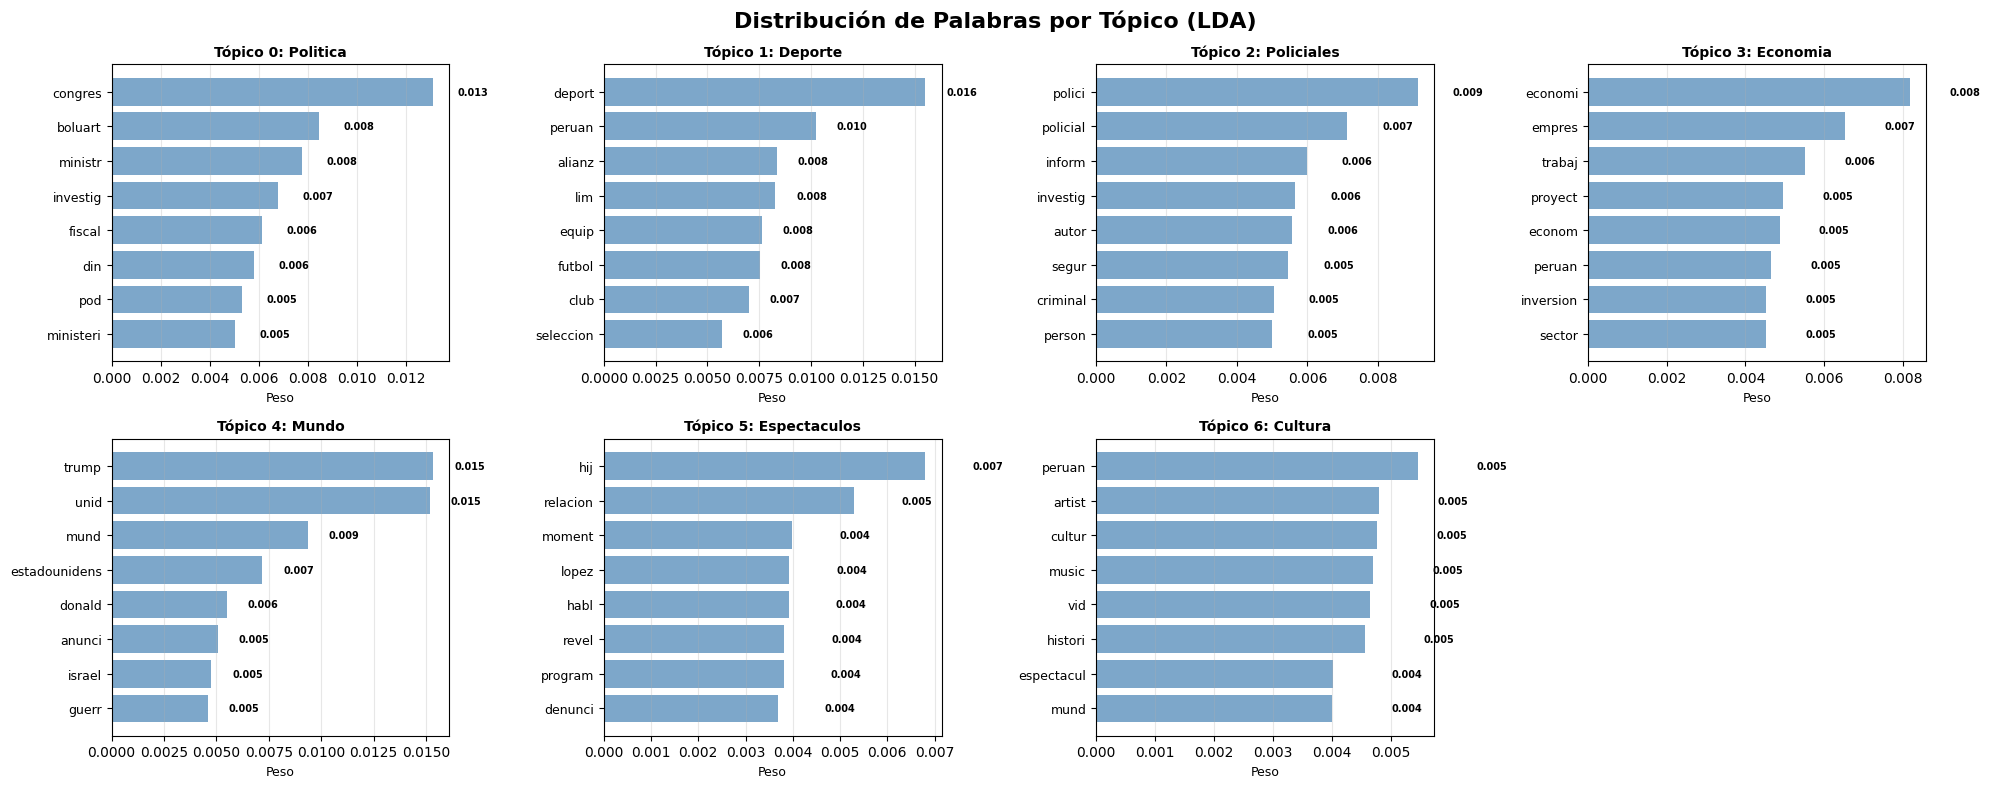

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_topics(lda_model, topic_names=None, num_words=8):
    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 8))
    fig.suptitle('Distribución de Palabras por Tópico (LDA)', fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    for idx, (topic_id, words) in enumerate(topics):
        if idx >= len(axes):
            break
            
        word_list = [word for word, _ in words]
        weight_list = [weight for _, weight in words]
 
        # Usar nombres de tópicos si están disponibles
        if topic_names and topic_id in topic_names:
            title = f"Tópico {topic_id}: {topic_names[topic_id]}"
        else:
            title = f"Tópico {topic_id}"

        axes[idx].barh(range(len(word_list)), weight_list, color='steelblue', alpha=0.7)
        axes[idx].set_yticks(range(len(word_list)))
        axes[idx].set_yticklabels(word_list, fontsize=9)
        axes[idx].set_xlabel('Peso', fontsize=9)
        axes[idx].set_title(title, fontsize=10, fontweight='bold')
        axes[idx].invert_yaxis()
        axes[idx].grid(axis='x', alpha=0.3)

        for i, weight in enumerate(weight_list):
            axes[idx].text(weight + 0.001, i, f'{weight:.3f}', 
                          va='center', fontsize=7, fontweight='bold')
    
    # Ocultar el último subplot vacío si hay 7 tópicos
    if len(topics) == 7:
        axes[7].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Llamar la función con los nombres de tópicos
visualize_topics(lda_model, topic_names=topic_names, num_words=8)

### Análisis de documentos por tópico

In [24]:
def get_document_topics(lda_model, bow_corpus, df, topic_names=None, num_docs=10):
    results = []
    
    for idx, doc_bow in enumerate(bow_corpus[:num_docs]):
        topic_distribution = lda_model.get_document_topics(doc_bow)

        if topic_distribution:
            dominant_topic = max(topic_distribution, key=lambda x: x[1])
            topic_id, topic_prob = dominant_topic
            
            # Agregar nombre del tópico si está disponible
            topic_name = topic_names.get(topic_id, f"Tópico {topic_id}") if topic_names else f"Tópico {topic_id}"
            
            results.append({
                'doc_id': idx,
                'titulo': df.iloc[idx]['titulo'][:60] + '...' if len(df.iloc[idx]['titulo']) > 60 else df.iloc[idx]['titulo'],
                'seccion': df.iloc[idx]['seccion'],
                'topic_id': topic_id,
                'topic_name': topic_name,
                'topic_prob': topic_prob
            })
    
    return pd.DataFrame(results)

doc_topics_df = get_document_topics(lda_model, bow_corpus, df, topic_names=topic_names, num_docs=20)

print("TÓPICO DOMINANTE POR DOCUMENTO")
print(doc_topics_df[['doc_id', 'titulo', 'seccion', 'topic_name', 'topic_prob']].to_string(index=False))

print("\nDistribución de documentos por tópico:")
topic_counts = doc_topics_df['topic_name'].value_counts()
for topic_name, count in topic_counts.items():
    print(f"   {topic_name}: {count} documentos")



TÓPICO DOMINANTE POR DOCUMENTO
 doc_id                                                          titulo      seccion   topic_name  topic_prob
      0 jueces rechazan intento de afectacion a la independencia del...     Política     Politica    0.912477
      1          liga lo gritan los churres y todo el pueblo de sullana     Deportes      Deporte    0.995084
      2 proponen sancionar con hasta anos de carcel a quienes se cub...     Política     Politica    0.592231
      3      este lunes inicia la semana de representacion del congreso     Política     Politica    0.925801
      4 seleccion peruana evalua reprogramacion de partidos amistoso...     Deportes      Deporte    0.392477
      5 jee de pacasmayo ordeno identificar a trabajador del congres...     Política     Politica    0.950770
      6 gobierno aprueba incremento de sueldo a diplomaticos embajad...     Política     Politica    0.687576
      7       geek festival peru se traslada al parque de la exposicion Espectáculos     

In [26]:
topic_vs_category = []

for idx, doc_bow in enumerate(bow_corpus):
    topic_distribution = lda_model.get_document_topics(doc_bow)
    
    if topic_distribution:
        dominant_topic = max(topic_distribution, key=lambda x: x[1])
        topic_id, topic_prob = dominant_topic
        
        topic_vs_category.append({
            'topic_id': topic_id,
            'topic_name': topic_names[topic_id],
            'categoria_real': df.iloc[idx]['seccion']
        })

comparison_df = pd.DataFrame(topic_vs_category)

print("COMPARACIÓN: Tópicos LDA vs Categorías Reales")
print("="*60)

crosstab = pd.crosstab(
    comparison_df['categoria_real'], 
    comparison_df['topic_name'], 
    margins=True
)

print(crosstab)


COMPARACIÓN: Tópicos LDA vs Categorías Reales
topic_name      Cultura  Deporte  Economia  Espectaculos  Mundo  Policiales  \
categoria_real                                                                
Cultura            2713      338       156            20     14          11   
Deportes             95     4307        19           109     22          82   
Economía             31        4      2948             1     45          14   
Espectáculos       3089       44        15          2890    179         133   
Mundo               562       15       225           682   2043        1456   
Policiales           13        2        47            66     12        2104   
Política            129        4      1005           763    180         426   
All                6632     4714      4415          4531   2495        4226   

topic_name      Politica    All  
categoria_real                   
Cultura                4   3256  
Deportes             105   4739  
Economía             125   